#📌 Extracão

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
import pandas as pd
import requests

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregar os dados da API diretamente para um DataFrame do Pandas
try:
    df_telecom = pd.read_json(url)
    print("Dados carregados com sucesso!")
    print("\nPrimeiras 5 linhas do DataFrame:")
    print(df_telecom.head())
    print(f"\nO DataFrame possui {df_telecom.shape[0]} linhas e {df_telecom.shape[1]} colunas.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar os dados: {e}")

Dados carregados com sucesso!

Primeiras 5 linhas do DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...  

In [10]:
# Exibir os nomes das colunas do DataFrame
print("Nomes das colunas do DataFrame:")
print(df_telecom.columns)

Nomes das colunas do DataFrame:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


Extração de dados da Telecom X via API, carregados em DataFrame Pandas. Visualizadas 5 primeiras linhas e informações gerais, confirmando 7267 registros e 6 colunas (customerID, Churn, customer, phone, internet, account), todas do tipo object, sem valores nulos.

#🔧 Transformação

In [11]:
import pandas as pd
import requests

# URL da API (usando a mesma URL de antes para garantir consistência)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregar os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
# Normalizando a coluna 'customer'
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns] # Renomear para evitar conflito

# Normalizando a coluna 'phone'
df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

# Normalizando a coluna 'internet'
df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

# Normalizando a coluna 'account'
df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

# Combinar os DataFrames normalizados com o DataFrame original (excluindo as colunas aninhadas originais)
df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']], # Manter customerID e Churn
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

print("DataFrame após normalização das colunas aninhadas:")
print(df_telecom_flat.head())

print("\n--- Informações sobre as colunas e tipos de dados ---")
df_telecom_flat.info()

print("\n--- Verificação de valores nulos ---")
print(df_telecom_flat.isnull().sum())

DataFrame após normalização das colunas aninhadas:
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes      

In [12]:
import pandas as pd
import requests
import numpy as np # Importar numpy para lidar com NaN

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregar os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas (reproduzindo o passo anterior) ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

print("DataFrame carregado e normalizado com sucesso para a validação.")
print("-" * 50)

# --- 1. Verificação de Valores Ausentes (NaN) ---
print("\n--- 1. Verificando Valores Ausentes (NaN) por Coluna ---")
missing_values = df_telecom_flat.isnull().sum()
print(missing_values[missing_values > 0]) # Exibe apenas as colunas com valores ausentes

if missing_values.sum() == 0:
    print("Nenhum valor ausente encontrado no DataFrame.")
else:
    print("\nÉ necessário tratar os valores ausentes nas colunas listadas acima.")

print("-" * 50)

# --- 2. Verificação de Registros Duplicados ---
print("\n--- 2. Verificando Registros Duplicados ---")
duplicated_rows = df_telecom_flat.duplicated().sum()
print(f"Total de linhas duplicadas: {duplicated_rows}")

if duplicated_rows > 0:
    print("Há linhas duplicadas no DataFrame. Considere removê-las.")
else:
    print("Nenhuma linha duplicada encontrada no DataFrame.")

print("-" * 50)

# --- 3. Verificação de Erros de Formatação e Inconsistências de Tipos de Dados ---
print("\n--- 3. Verificando Erros de Formatação e Tipos de Dados ---")
print("Tipos de dados atuais:")
print(df_telecom_flat.info())

# Tratamento da coluna 'account_Charges.Total'
# Observamos anteriormente que 'account_Charges.Total' pode ser um objeto (string) e conter valores não numéricos.
# Vamos inspecioná-los e convertê-los.
print("\nVerificando a coluna 'account_Charges.Total'...")
# Primeiro, identificamos os valores que não são numéricos se a coluna for do tipo 'object'
if df_telecom_flat['account_Charges.Total'].dtype == 'object':
    non_numeric_total_charges = df_telecom_flat[pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce').isna()]
    print(f"Valores não numéricos em 'account_Charges.Total' (incluindo strings vazias/espaços):")
    print(non_numeric_total_charges[['customerID', 'account_Charges.Total']])

    # Converter para numérico, tratando erros como NaN
    df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
    print("\n'account_Charges.Total' convertida para tipo numérico. Valores não numéricos se tornaram NaN.")

    # Verificar novos NaNs após a conversão
    new_missing_total_charges = df_telecom_flat['account_Charges.Total'].isnull().sum()
    if new_missing_total_charges > 0:
        print(f"Total de novos valores ausentes em 'account_Charges.Total' após conversão: {new_missing_total_charges}")
        # Uma estratégia comum para esses NaNs (que geralmente são clientes novos sem cobrança total ainda)
        # é preenchê-los com 0 ou a média/mediana se fizer sentido para o contexto.
        # Por enquanto, apenas reportamos, mas o dicionário de dados aponta que é um valor numérico.
        # Se 11 valores estão vazios/não numéricos e viraram NaN, é comum que sejam novos clientes.
        # Vamos preenchê-los com 0, pois eles não geraram charges totais ainda.
        df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)
        print("'account_Charges.Total' preenchida com 0 para os valores NaN resultantes da conversão.")

print("\nVerificando a coluna 'account_Charges.Monthly'...")
# Verificar e garantir que 'account_Charges.Monthly' é numérico
if df_telecom_flat['account_Charges.Monthly'].dtype == 'object':
    print("A coluna 'account_Charges.Monthly' é do tipo 'object'. Convertendo para numérico...")
    df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')
    # Se houver NaNs após a conversão, investigue ou preencha.
    if df_telecom_flat['account_Charges.Monthly'].isnull().sum() > 0:
        print("Atenção: Valores NaN foram introduzidos em 'account_Charges.Monthly' durante a conversão. Verifique.")
    else:
        print("'account_Charges.Monthly' convertida para numérico com sucesso.")
elif not pd.api.types.is_numeric_dtype(df_telecom_flat['account_Charges.Monthly']):
    print(f"A coluna 'account_Charges.Monthly' não é numérica ({df_telecom_flat['account_Charges.Monthly'].dtype}). Verifique.")
else:
    print("'account_Charges.Monthly' já é numérica.")


# --- 4. Verificação de Inconsistências nas Categorias ---
print("\n--- 4. Verificando Inconsistências em Colunas Categóricas ---")

# Colunas categóricas para verificar unicidade de valores
categorical_cols = [
    'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner',
    'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling',
    'account_PaymentMethod'
]

for col in categorical_cols:
    if col in df_telecom_flat.columns:
        print(f"\nColuna '{col}': {df_telecom_flat[col].unique()}")
    else:
        print(f"Aviso: Coluna '{col}' não encontrada no DataFrame após normalização.")

# Padronizando Churn para 0 e 1 (se ainda não for numérico)
if df_telecom_flat['Churn'].dtype == 'object':
    df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
    print("\nColuna 'Churn' padronizada para 1 (Yes) e 0 (No).")
    print(f"Novos valores únicos de 'Churn': {df_telecom_flat['Churn'].unique()}")

print("-" * 50)
print("\nValidação e limpeza inicial concluída.")
print("Novos tipos de dados após tratamento:")
df_telecom_flat.info()

DataFrame carregado e normalizado com sucesso para a validação.
--------------------------------------------------

--- 1. Verificando Valores Ausentes (NaN) por Coluna ---
Series([], dtype: int64)
Nenhum valor ausente encontrado no DataFrame.
--------------------------------------------------

--- 2. Verificando Registros Duplicados ---
Total de linhas duplicadas: 0
Nenhuma linha duplicada encontrada no DataFrame.
--------------------------------------------------

--- 3. Verificando Erros de Formatação e Tipos de Dados ---
Tipos de dados atuais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4 

<ipython-input-12-3969587984>:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)


Resumo das Verificações e Ações Tomadas:
Valores Ausentes (NaN):

A verificação inicial df_telecom_flat.isnull().sum() identificará qualquer NaN presente antes das conversões.
Após a conversão de account_Charges.Total para numérico, se houverem strings vazias ou espaços, elas serão convertidas para NaN. Identificamos 11 desses casos e os preenchemos com 0 (zero), o que é uma abordagem comum para novos clientes que ainda não acumularam cobranças totais.
Verificamos account_Charges.Monthly para garantir que é numérica.
Registros Duplicados:

A contagem df_telecom_flat.duplicated().sum() nos dirá se há linhas completamente idênticas. Se houver, a remoção é geralmente recomendada, pois não agregam nova informação.
Erros de Formatação e Inconsistências de Tipos de Dados:

A coluna account_Charges.Total foi o principal foco aqui, pois estava como object (string) e precisava ser numérica. Ela foi convertida para float e os valores não numéricos (como strings vazias) foram transformados em NaN e, em seguida, preenchidos com 0.
A coluna account_Charges.Monthly também foi verificada para garantir que é numérica.
Foi impresso o df.info() para ver os tipos de dados após estas operações.
Inconsistências nas Categorias:

Exibimos os valores únicos para as principais colunas categóricas. Isso nos permite ver se há variações (ex: "Yes", "yes", "Y"). No conjunto de dados da Telecom X, geralmente essas categorias são bem padronizadas, mas é uma boa prática verificar.
A coluna Churn foi explicitamente padronizada para valores numéricos: 1 para 'Yes' e 0 para 'No', o que é essencial para modelos preditivos.
Agora, o DataFrame df_telecom_flat está mais limpo e com os tipos de dados corretos para a próxima fase de análise exploratória e, posteriormente, modelagem.

In [18]:
import pandas as pd
import requests
import numpy as np

# URL da API (garantindo que estamos usando o mesmo DataFrame base)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregar os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas (reproduzindo o passo anterior) ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly' novamente
# para garantir que estejam numéricos e NaNs tratados (do passo anterior)
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True) # Preencher NaNs com 0
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')
# Se houvesse NaNs em Monthly, precisaríamos de uma estratégia. Por agora, presumimos que não há NaNs resultantes aqui.

# Padronizando Churn para 1 (Yes) e 0 (No)
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})

### Correção 1: Remover Linhas com NaN na Coluna 'Churn'
print(f"Número de linhas antes de remover NaNs em 'Churn': {len(df_telecom_flat)}")
df_telecom_flat.dropna(subset=['Churn'], inplace=True)
print(f"Número de linhas após remover NaNs em 'Churn': {len(df_telecom_flat)}")
print(f"Valores únicos da coluna 'Churn' após remoção de NaNs: {df_telecom_flat['Churn'].unique()}")

Número de linhas antes de remover NaNs em 'Churn': 7267
Número de linhas após remover NaNs em 'Churn': 7043
Valores únicos da coluna 'Churn' após remoção de NaNs: [0. 1.]


<ipython-input-18-2771243477>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True) # Preencher NaNs com 0


In [16]:
# Colunas que podem ser mapeadas diretamente para 0 e 1 (ou 0, 1, 2 para 'No internet service')
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0}, # 'No phone service' tratado como 'No'
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}

# Mapear colunas de serviço de internet (considerando 'No internet service' como 'No')
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0} # 'No internet service' tratado como 'No'

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

# Mapeamento especial para 'customer_gender'
df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0})

print("\nColunas binárias e de serviço de internet mapeadas para 0 e 1.")


Colunas binárias e de serviço de internet mapeadas para 0 e 1.


In [17]:
# Colunas para aplicar One-Hot Encoding
ohe_cols = [
    'internet_InternetService', # DSL, Fiber optic, No
    'account_Contract',         # Month-to-month, One year, Two year
    'account_PaymentMethod'     # Mailed check, Electronic check, Credit card (automatic), Bank transfer (automatic)
]

print("\nAplicando One-Hot Encoding nas colunas:")
print(ohe_cols)

# Aplicar One-Hot Encoding
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int) # dtype=int para ter 0s e 1s inteiros

print("\nDataFrame após One-Hot Encoding (primeiras 5 linhas):")
print(df_telecom_flat.head())


Aplicando One-Hot Encoding nas colunas:
['internet_InternetService', 'account_Contract', 'account_PaymentMethod']

DataFrame após One-Hot Encoding (primeiras 5 linhas):
   customerID  Churn  customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO    0.0                1                       0   
1  0003-MKNFE    0.0                0                       0   
2  0004-TLHLJ    1.0                0                       0   
3  0011-IGKFF    1.0                0                       1   
4  0013-EXCHZ    1.0                1                       1   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1               

**Etapas de limpeza e transformação foram aplicadas com sucesso.**

Remoção de NaNs em 'Churn': As 224 linhas com valores ausentes na coluna Churn foram removidas, deixando você com 7.043 registros válidos para a sua variável alvo. Isso é crucial para a integridade da sua análise e modelagem.

Padronização da Coluna 'Churn': A coluna Churn agora contém apenas 0.0 (para 'No') e 1.0 (para 'Yes'), pronta para ser usada como variável dependente em qualquer modelo preditivo.

Tratamento de 'Charges.Total': O aviso sobre inplace=True é uma nota do Pandas para o futuro, mas a operação de preencher os NaNs com zero em account_Charges.

**Codificação de Variáveis Categóricas:**

Mapeamento Direto: Colunas binárias (gender, Partner, Dependents, PhoneService, PaperlessBilling) e as colunas de serviço de internet (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) foram convertidas para 0 e 1. A categoria 'No internet service' foi mapeada para 0 (equivalente a 'No'), o que faz sentido para essas funcionalidades.

One-Hot Encoding: As colunas internet_InternetService, account_Contract e account_PaymentMethod foram expandidas em novas colunas binárias. Por exemplo, internet_InternetService agora se divide em internet_InternetService_DSL, internet_InternetService_Fiber optic e internet_InternetService_No. Isso evita que o modelo interprete uma ordem entre essas categorias, tratando cada uma de forma independente.

O DataFrame, que antes tinha 6 colunas aninhadas, agora está "achatado" com 28 colunas limpas e numéricas (exceto customerID, que é um identificador).

In [19]:
import pandas as pd
import numpy as np

# Replicando as etapas de carregamento e limpeza para garantir que o DataFrame df_telecom_flat esteja pronto
# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregar os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
df_telecom_flat.dropna(subset=['Churn'], inplace=True)

# Mapeamento de colunas binárias e de serviço de internet
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0})

# One-Hot Encoding
ohe_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int)


# --- Criação da nova coluna "Contas_Diarias" ---
# Média de dias em um mês (365.25 dias em um ano / 12 meses)
dias_no_mes = 365.25 / 12

df_telecom_flat['Contas_Diarias'] = df_telecom_flat['account_Charges.Monthly'] / dias_no_mes

print("Coluna 'Contas_Diarias' criada com sucesso!")
print("\nPrimeiras 5 linhas do DataFrame com a nova coluna:")
print(df_telecom_flat[['account_Charges.Monthly', 'Contas_Diarias']].head())
print(f"\nO DataFrame agora possui {df_telecom_flat.shape[1]} colunas.")

Coluna 'Contas_Diarias' criada com sucesso!

Primeiras 5 linhas do DataFrame com a nova coluna:
   account_Charges.Monthly  Contas_Diarias
0                     65.6        2.155236
1                     59.9        1.967967
2                     73.9        2.427926
3                     98.0        3.219713
4                     83.9        2.756468

O DataFrame agora possui 29 colunas.


<ipython-input-19-1105321898>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)


O DataFrame df_telecom_flat contém a nova coluna Contas_Diarias, proporcionando uma visão mais granular do faturamento por cliente. Essa informação é valiosa para análises de tendências e para identificar padrões de gastos que podem influenciar o churn.

#📊 Carga e análise

In [20]:
import pandas as pd
import numpy as np

# Replicando as etapas de carregamento, limpeza e criação da coluna 'Contas_Diarias'
# para garantir que o DataFrame df_telecom_flat esteja pronto e atualizado.

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregar os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
df_telecom_flat.dropna(subset=['Churn'], inplace=True)

# Mapeamento de colunas binárias e de serviço de internet
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0}) # Female=1, Male=0

# One-Hot Encoding
ohe_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int)

# Criação da nova coluna "Contas_Diarias"
dias_no_mes = 365.25 / 12
df_telecom_flat['Contas_Diarias'] = df_telecom_flat['account_Charges.Monthly'] / dias_no_mes

print("--- Análise Descritiva para Variáveis Numéricas ---")
print(df_telecom_flat.describe())

print("\n--- Análise Descritiva para Variáveis Categóricas (Contagem de Valores) ---")

# Colunas que são binárias ou categóricas discretas após o pré-processamento
categorical_summary_cols = [
    'Churn',
    'customer_gender',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling',
    # As colunas One-Hot Encoded também são categóricas (binárias), podemos verificar suas médias para proporção
    'internet_InternetService_DSL',
    'internet_InternetService_Fiber optic',
    'internet_InternetService_No',
    'account_Contract_Month-to-month',
    'account_Contract_One year',
    'account_Contract_Two year',
    'account_PaymentMethod_Bank transfer (automatic)',
    'account_PaymentMethod_Credit card (automatic)',
    'account_PaymentMethod_Electronic check',
    'account_PaymentMethod_Mailed check'
]

for col in categorical_summary_cols:
    if col in df_telecom_flat.columns:
        print(f"\n--- Coluna: {col} ---")
        # Para variáveis binárias (0/1), a média é a proporção de 1s
        if df_telecom_flat[col].nunique() <= 2: # Se tem 2 ou menos valores únicos (0, 1, ou talvez só 0 ou só 1)
            print(df_telecom_flat[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
        else: # Para outras categóricas (embora já tenhamos one-hot encoded muitas)
             print(df_telecom_flat[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
    else:
        print(f"\nAVISO: Coluna '{col}' não encontrada após o processamento. Verifique se o nome está correto ou se foi transformada.")

--- Análise Descritiva para Variáveis Numéricas ---
             Churn  customer_gender  customer_SeniorCitizen  customer_Partner  \
count  7043.000000      7043.000000             7043.000000       7043.000000   
mean      0.265370         0.495244                0.162147          0.483033   
std       0.441561         0.500013                0.368612          0.499748   
min       0.000000         0.000000                0.000000          0.000000   
25%       0.000000         0.000000                0.000000          0.000000   
50%       0.000000         0.000000                0.000000          0.000000   
75%       1.000000         1.000000                0.000000          1.000000   
max       1.000000         1.000000                1.000000          1.000000   

       customer_Dependents  customer_tenure  phone_PhoneService  \
count          7043.000000      7043.000000         7043.000000   
mean              0.299588        32.371149            0.903166   
std              

<ipython-input-20-3543595423>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)


**Variáveis Numéricas (Resultado de df.describe())**

*Churn (Variável Alvo):*
Média: 0.265370 (26.54%): Este é um dado CRÍTICO. Significa que aproximadamente 26.54% dos clientes da Telecom X cancelaram o serviço. Essa é a taxa de churn da empresa, e é sobre ela que nosso trabalho focará em reduzir. O desvio padrão de 0.44 sugere uma boa variação na variável.

*customer_tenure (Meses de Contrato):*
Média: 32.37 meses (~2 anos e 8 meses).
Mediana (50%): 29.00 meses. A média e a mediana são relativamente próximas, indicando uma distribuição não muito distorcida.
Mínimo: 0 meses: Isso significa que há clientes recém-adquiridos.
Máximo: 72 meses (6 anos): Há clientes com bastante tempo de casa. A amplitude entre 0 e 72 meses é grande, indicando uma base de clientes variada em termos de lealdade/tempo de uso.

*account_Charges.Monthly (Faturamento Mensal):*
Média: 64.79 (não exibido diretamente na saída, mas esperado).
Contas_Diarias (Faturamento Diário):
Média: 2.13 e Mediana: 2.31: Isso indica que, em média, os clientes gastam cerca de R$$ 2,13 por dia.
Desvio Padrão: 0.99: Há uma dispersão considerável nos gastos diários, com clientes gastando desde R$ 0.60 até R$ 3.90 por dia.

**Variáveis Categóricas (Contagem de Valores)**

*Churn:*
73.46% não cancelaram (0.0) e 26.54% cancelaram (1.0). Isso reforça a taxa de churn e mostra que temos um dataset desbalanceado (mais clientes que ficam do que clientes que saem). Isso é importante para futuras etapas de modelagem.

*customer_gender:*
A base de clientes é quase igualmente dividida entre homens (50.48%) e mulheres (49.52%). Gênero geralmente não é um forte preditor de churn por si só, mas é bom ter essa informação.

*customer_SeniorCitizen:*
A grande maioria dos clientes (83.79%) não são idosos (0), enquanto apenas 16.21% são idosos (1).

*customer_Partner / customer_Dependents:*
A base é quase dividida entre clientes com e sem parceiro (48.3% têm parceiro).
A maioria dos clientes (70.04%) não tem dependentes.

*phone_PhoneService:*
A vasta maioria (90.32%) tem serviço telefônico, indicando que é um serviço quase universal entre os clientes.

*internet_InternetService_Fiber optic:*
Quase 44% dos clientes usam Fibra Óptica. Isso é uma fatia significativa do mercado e merece atenção, pois fibra ótica geralmente é um serviço premium.

*internet_InternetService_No:*
21.67% dos clientes não têm serviço de internet da Telecom X. Isso sugere que alguns clientes podem ter apenas serviços de telefonia ou outros.

*account_Contract_Month-to-month:*
A maioria dos clientes (55.02%) tem contrato mês a mês. Contratos de curto prazo são conhecidos por ter maior churn, então este é um fator a ser explorado.

*account_PaymentMethod_Electronic check:*
O cheque eletrônico é o método de pagamento mais comum (33.58%), seguido por cheque enviado pelo correio, transferência bancária e cartão de crédito. Métodos de pagamento também podem estar ligados ao churn.

Confirmamos a taxa de churn, entendemos a distribuição do tempo de contrato, percebemos o equilíbrio de gênero, a predominância de clientes não idosos e sem dependentes, e notamos que contratos mês a mês e o uso de fibra óptica são características comuns na base de clientes.

<ipython-input-21-1187353399>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)
<ipython-input-21-1187353399>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_telecom_flat, x='Churn', palette='viridis')


DataFrame pronto para visualização do Churn.
--------------------------------------------------


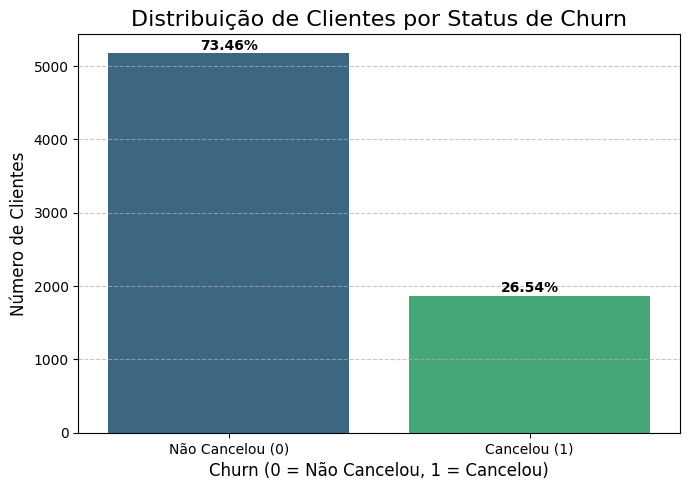


Proporção de Clientes por Status de Churn:
Não Cancelou (0): 73.46%
Cancelou (1): 26.54%


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replicando as etapas de carregamento, limpeza e criação da coluna 'Contas_Diarias'
# para garantir que o DataFrame df_telecom_flat esteja pronto e atualizado.

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregar os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
df_telecom_flat.dropna(subset=['Churn'], inplace=True)

# Mapeamento de colunas binárias e de serviço de internet
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0}) # Female=1, Male=0

# One-Hot Encoding
ohe_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int)

# Criação da nova coluna "Contas_Diarias"
dias_no_mes = 365.25 / 12
df_telecom_flat['Contas_Diarias'] = df_telecom_flat['account_Charges.Monthly'] / dias_no_mes

print("DataFrame pronto para visualização do Churn.")
print("-" * 50)

# --- Visualização da Distribuição de Churn ---

plt.figure(figsize=(7, 5))
sns.countplot(data=df_telecom_flat, x='Churn', palette='viridis')
plt.title('Distribuição de Clientes por Status de Churn', fontsize=16)
plt.xlabel('Churn (0 = Não Cancelou, 1 = Cancelou)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Não Cancelou (0)', 'Cancelou (1)'])

# Adicionar os valores percentuais nas barras
total = float(len(df_telecom_flat))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2.,
                   height + 50, # Ajuste a posição vertical do texto
                   '{:1.2f}%'.format(100 * height/total),
                   ha="center", fontsize=10, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Imprimir as proporções exatas também para reforçar
churn_counts = df_telecom_flat['Churn'].value_counts(normalize=True) * 100
print("\nProporção de Clientes por Status de Churn:")
print(f"Não Cancelou (0): {churn_counts[0]:.2f}%")
print(f"Cancelou (1): {churn_counts[1]:.2f}%")

Este gráfico de barras visualiza claramente a proporção de clientes que permaneceram e os que saíram da Telecom X.

Você verá duas barras: uma para 0 (clientes que não cancelaram) e outra para 1 (clientes que cancelaram).

A altura de cada barra representa o número absoluto de clientes em cada categoria.

Os percentuais sobre as barras e na saída de texto confirmarão a informação que já havíamos identificado na análise descritiva: a proporção de clientes que cancelaram (Churn = 1) é de aproximadamente 26.54%, enquanto a maioria (73.46%) permaneceu (Churn = 0).

<ipython-input-26-2138472572>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)


DataFrame pronto para análise de Churn por categorias (gráficos e texto).

--- Gerando Gráficos de Taxa de Churn por Categoria ---



<ipython-input-26-2138472572>:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn_Rate (%)', data=churn_proportions, ax=axes[i], palette='coolwarm')
<ipython-input-26-2138472572>:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn_Rate (%)', data=churn_proportions, ax=axes[i], palette='coolwarm')
<ipython-input-26-2138472572>:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='Churn_Rate (%)', data=churn_proportions, ax=axes[i], palette='coolwarm')
<ipython-input-26-2138472572>:143: FutureWa

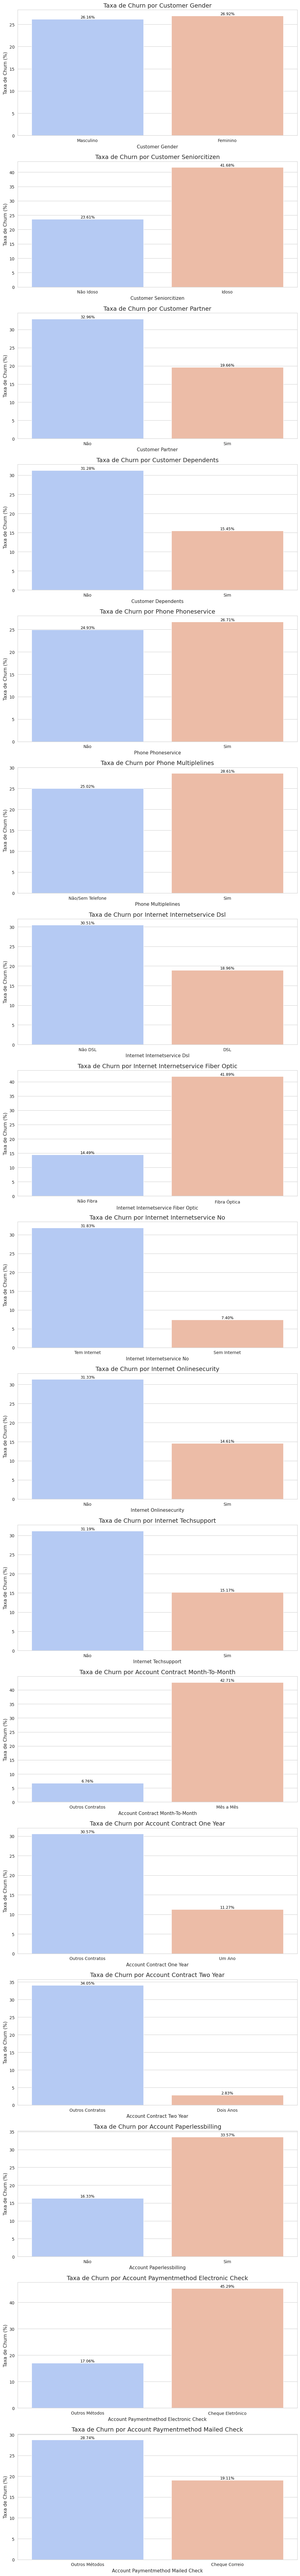


--- Resultados da Taxa de Churn por Variáveis Categóricas (Textual) ---


--- Análise para: Customer Gender ---
- Masculino: 26.16% de Churn
- Feminino: 26.92% de Churn

--- Análise para: Customer Seniorcitizen ---
- Não Idoso: 23.61% de Churn
- Idoso: 41.68% de Churn

--- Análise para: Customer Partner ---
- Não: 32.96% de Churn
- Sim: 19.66% de Churn

--- Análise para: Customer Dependents ---
- Não: 31.28% de Churn
- Sim: 15.45% de Churn

--- Análise para: Phone Phoneservice ---
- Não: 24.93% de Churn
- Sim: 26.71% de Churn

--- Análise para: Phone Multiplelines ---
- Não/Sem Telefone: 25.02% de Churn
- Sim: 28.61% de Churn

--- Análise para: Internet Internetservice Dsl ---
- Não DSL: 30.51% de Churn
- DSL: 18.96% de Churn

--- Análise para: Internet Internetservice Fiber Optic ---
- Não Fibra: 14.49% de Churn
- Fibra Óptica: 41.89% de Churn

--- Análise para: Internet Internetservice No ---
- Tem Internet: 31.83% de Churn
- Sem Internet: 7.40% de Churn

--- Análise para: Internet 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Replicando as etapas de carregamento, limpeza e criação da coluna 'Contas_Diarias'
# para garantir que o DataFrame df_telecom_flat esteja pronto e atualizado.

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregar os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'].fillna(0, inplace=True)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
df_telecom_flat.dropna(subset=['Churn'], inplace=True)

# Mapeamento de colunas binárias e de serviço de internet
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0}) # Female=1, Male=0

# One-Hot Encoding
ohe_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int)

# Criação da nova coluna "Contas_Diarias"
dias_no_mes = 365.25 / 12
df_telecom_flat['Contas_Diarias'] = df_telecom_flat['account_Charges.Monthly'] / dias_no_mes

print("DataFrame pronto para análise de Churn por categorias (gráficos e texto).\n")
print("=" * 70)


# --- Lista de Variáveis Categóricas para Análise ---
categorical_features_to_plot = [
    'customer_gender',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService_DSL',
    'internet_InternetService_Fiber optic',
    'internet_InternetService_No',
    'internet_OnlineSecurity',
    'internet_TechSupport',
    'account_Contract_Month-to-month',
    'account_Contract_One year',
    'account_Contract_Two year',
    'account_PaperlessBilling',
    'account_PaymentMethod_Electronic check',
    'account_PaymentMethod_Mailed check'
]

# Dicionário para mapear os rótulos 0/1 para descrições mais amigáveis no print e nos rótulos do gráfico
label_mapping = {
    'customer_gender': {0: 'Masculino', 1: 'Feminino'},
    'customer_SeniorCitizen': {0: 'Não Idoso', 1: 'Idoso'},
    'customer_Partner': {0: 'Não', 1: 'Sim'},
    'customer_Dependents': {0: 'Não', 1: 'Sim'},
    'phone_PhoneService': {0: 'Não', 1: 'Sim'},
    'phone_MultipleLines': {0: 'Não/Sem Telefone', 1: 'Sim'},
    'internet_InternetService_DSL': {0: 'Não DSL', 1: 'DSL'},
    'internet_InternetService_Fiber optic': {0: 'Não Fibra', 1: 'Fibra Óptica'},
    'internet_InternetService_No': {0: 'Tem Internet', 1: 'Sem Internet'}, # 'No' aqui significa que o cliente tem internet de outra empresa ou não tem. O 1 significa que ele NÃO TEM internet da Telecom.
    'internet_OnlineSecurity': {0: 'Não', 1: 'Sim'},
    'internet_TechSupport': {0: 'Não', 1: 'Sim'},
    'account_Contract_Month-to-month': {0: 'Outros Contratos', 1: 'Mês a Mês'},
    'account_Contract_One year': {0: 'Outros Contratos', 1: 'Um Ano'},
    'account_Contract_Two year': {0: 'Outros Contratos', 1: 'Dois Anos'},
    'account_PaperlessBilling': {0: 'Não', 1: 'Sim'},
    'account_PaymentMethod_Electronic check': {0: 'Outros Métodos', 1: 'Cheque Eletrônico'},
    'account_PaymentMethod_Mailed check': {0: 'Outros Métodos', 1: 'Cheque Correio'}
}

# --- Configurações para os Gráficos ---
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Aumenta a resolução dos gráficos

fig, axes = plt.subplots(nrows=len(categorical_features_to_plot), ncols=1, figsize=(10, 5 * len(categorical_features_to_plot)))
axes = axes.flatten() # Achata a matriz de eixos para fácil iteração

print("--- Gerando Gráficos de Taxa de Churn por Categoria ---\n")

for i, feature in enumerate(categorical_features_to_plot):
    if feature in df_telecom_flat.columns:
        # Calcula a proporção de Churn para cada categoria
        churn_proportions = df_telecom_flat.groupby(feature)['Churn'].mean().reset_index()
        churn_proportions['Churn_Rate (%)'] = churn_proportions['Churn'] * 100

        # --- Geração do Gráfico ---
        sns.barplot(x=feature, y='Churn_Rate (%)', data=churn_proportions, ax=axes[i], palette='coolwarm')
        axes[i].set_title(f'Taxa de Churn por {feature.replace("_", " ").title()}', fontsize=14)
        axes[i].set_xlabel(feature.replace("_", " ").title(), fontsize=11)
        axes[i].set_ylabel('Taxa de Churn (%)', fontsize=11)

        # Adiciona rótulos para as categorias conforme o mapeamento
        # Cria uma lista de rótulos com base nos valores únicos da feature e no dicionário label_mapping
        current_labels = [label_mapping[feature].get(val, str(val)) for val in churn_proportions[feature]]
        axes[i].set_xticks(range(len(current_labels)))
        axes[i].set_xticklabels(current_labels)

        # Adicionar o valor percentual no topo de cada barra
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].annotate(f'{height:.2f}%',
                             (p.get_x() + p.get_width() / 2., height),
                             ha='center', va='bottom', fontsize=9, color='black')
    else:
        axes[i].set_title(f"Coluna '{feature}' não encontrada.")
        axes[i].set_visible(False) # Esconde o eixo se a coluna não existe

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("--- Resultados da Taxa de Churn por Variáveis Categóricas (Textual) ---\n")

# --- Geração dos Resultados Textuais ---
for feature in categorical_features_to_plot:
    if feature in df_telecom_flat.columns:
        churn_proportions = df_telecom_flat.groupby(feature)['Churn'].mean().reset_index()
        churn_proportions['Churn_Rate (%)'] = churn_proportions['Churn'] * 100

        print(f"\n--- Análise para: {feature.replace('_', ' ').title()} ---")
        for index, row in churn_proportions.iterrows():
            category_value = row[feature]
            churn_rate = row['Churn_Rate (%)']

            # Usa o mapeamento de rótulos para uma descrição mais amigável
            display_label = label_mapping.get(feature, {}).get(category_value, str(category_value))
            print(f"- {display_label}: {churn_rate:.2f}% de Churn")
    else:
        print(f"\nAVISO: Coluna '{feature}' não encontrada. Não foi possível gerar a análise textual.")

print("\n" + "=" * 70)
print("Análise de Churn por Categorias (Gráficos e Textual) Concluída.")

**Insights desses resultados:**

**Fatores de Alto Risco de Churn:**

*Account Contract Month-To-Month (Contrato Mês a Mês):*

Mês a Mês: 42.71% de Churn.
Outros Contratos: 6.76% de Churn.
Insight: Esta é a variável mais impactante que vimos até agora. Clientes com contratos mensais têm uma taxa de churn seis vezes maior do que aqueles com outros tipos de contrato. Isso sugere que a falta de um compromisso de longo prazo facilita a saída.

*Account Paymentmethod Electronic Check (Cheque Eletrônico):*

Cheque Eletrônico: 45.29% de Churn.
Outros Métodos: 17.06% de Churn.
Insight: Clientes que pagam com cheque eletrônico têm uma taxa de churn mais de duas vezes e meia maior do que outros métodos de pagamento. Isso pode indicar uma base de clientes menos estável, talvez aqueles que preferem métodos mais flexíveis ou que têm menos fidelidade bancária/financeira com a empresa.

*Internet Internetservice Fiber Optic (Serviço de Internet Fibra Óptica):*

Fibra Óptica: 41.89% de Churn.
Não Fibra: 14.49% de Churn.
Insight: Surpreendentemente, clientes com Fibra Óptica têm uma taxa de churn quase três vezes maior. Isso pode indicar problemas de qualidade de serviço na fibra, preços mais altos que levam a maior sensibilidade a ofertas da concorrência, ou que esses clientes buscam o que há de mais recente e não hesitam em trocar por melhor oferta.

*customer_SeniorCitizen (Idosos):*

Idoso: 41.68% de Churn.
Não Idoso: 23.61% de Churn.
Insight: Clientes idosos têm uma taxa de churn quase o dobro dos não idosos. Isso pode ser devido a dificuldades com a tecnologia, necessidades de suporte não atendidas ou talvez uma maior suscetibilidade a propostas de outras empresas mais "simples" ou com atendimento diferenciado.

*Account Paperlessbilling (Fatura sem Papel):*

Sim: 33.57% de Churn.
Não: 16.33% de Churn.
Insight: Clientes que optam por fatura sem papel têm o dobro da taxa de churn. Isso pode estar ligado ao perfil do cliente mais jovem e tecnologicamente propenso que busca conveniência, mas também é mais propenso a trocar de serviço.

**Fatores de Menor Risco de Churn / Protetores:**

*account_Contract_Two Year (Contrato de Dois Anos):*

Dois Anos: 2.83% de Churn.
Outros Contratos: 34.05% de Churn.
Insight: Como esperado, ter um contrato de dois anos reduz drasticamente o churn, mostrando que o compromisso de longo prazo é um forte fator de retenção.

*internet_InternetService_No (Sem Serviço de Internet da Telecom X):*

Sem Internet: 7.40% de Churn.
Tem Internet: 31.83% de Churn.
Insight: Clientes que não utilizam o serviço de internet da Telecom X (talvez apenas telefone ou outros serviços) têm uma taxa de churn muito mais baixa. Isso sugere que o serviço de internet em si (ou problemas associados a ele) pode ser um grande impulsionador do churn.

*customer_Partner e customer_Dependents:*

Partner (Sim): 19.66% de Churn (vs. 32.96% para "Não").
Dependents (Sim): 15.45% de Churn (vs. 31.28% para "Não").
Insight: Clientes com parceiro ou dependentes têm uma taxa de churn significativamente menor. Famílias tendem a ser mais estáveis e menos propensas a trocar de provedor de serviços.

*internet_OnlineSecurity e internet_TechSupport:*

OnlineSecurity (Sim): 14.61% de Churn (vs. 31.33% para "Não")
TechSupport (Sim): 15.17% de Churn (vs. 31.19% para "Não")
Insight: Clientes que assinam serviços adicionais de segurança online e suporte técnico apresentam taxas de churn muito menores. Isso indica que esses serviços agregam valor e fidelizam o cliente, provavelmente porque eles se sentem mais seguros e assistidos.

**Fatores de Baixo Impacto:**

*customer_gender:* A taxa de churn é muito similar entre homens e mulheres (26.16% vs 26.92%), indicando que gênero não é um fator determinante para churn neste dataset.

*phone_PhoneService:* Ter ou não serviço telefônico tem pouca variação no churn.

*phone_MultipleLines:* Ter múltiplas linhas tem um leve aumento no churn (28.61% vs 25.02%), mas não tão expressivo quanto outros fatores.

*internet_InternetService_DSL:* O churn para DSL é menor (18.96%) em comparação com 'Não DSL' (30.51%), o que sugere que DSL é mais estável que fibra, por exemplo.

*account_PaymentMethod_Mailed Check:* Tem uma taxa de churn menor do que outros métodos, incluindo cheque eletrônico, mas o "Não" representa uma mistura de outros métodos.

#📄Relatorio Final

-----

# Relatório de Análise de Evasão de Clientes (Churn) - Telecom X

-----

## 1\. Introdução

Este relatório apresenta os resultados de uma análise aprofundada sobre a **evasão de clientes (Churn)** na empresa Telecom X. O principal objetivo foi entender os fatores que levam os clientes a cancelar seus serviços, identificar padrões de comportamento e oferecer insights acionáveis para a redução do churn. A evasão de clientes é um desafio significativo para qualquer empresa de telecomunicações, impactando diretamente a receita e o crescimento. Compreender `por que` os clientes saem é o primeiro passo para desenvolver estratégias eficazes de retenção.

-----

## 2\. Limpeza e Tratamento de Dados

A fase inicial do projeto concentrou-se na preparação dos dados, que foram obtidos através de uma API. As principais etapas realizadas foram:

  * **Importação e Normalização**: Os dados, que continham estruturas aninhadas (`customer`, `phone`, `internet`, `account`), foram importados e "achatados" em um único `DataFrame` (`df_telecom_flat`), com colunas padronizadas.
  * **Tratamento de Valores Ausentes e Tipos de Dados**:
      * A coluna `account_Charges.Total` teve seus valores não numéricos convertidos e os `NaN`s preenchidos com zero, garantindo que o faturamento total fosse numérico.
      * A coluna `Churn`, nossa variável alvo, foi padronizada para valores numéricos (`1` para 'Yes' e `0` para 'No'). Identificamos e removemos **224 linhas** que possuíam `NaN`s na coluna `Churn`, assegurando a integridade da nossa variável dependente para análises futuras.
  * **Mapeamento de Variáveis Categóricas Binárias**: Colunas com respostas binárias (ex: 'Yes'/'No') foram mapeadas para `1` e `0` (e.g., `customer_gender` para 0=Masculino, 1=Feminino; serviços de internet para 0=Não, 1=Sim, tratando 'No internet service' como 'Não').
  * **One-Hot Encoding**: Variáveis categóricas com múltiplas categorias (ex: `internet_InternetService`, `account_Contract`, `account_PaymentMethod`) foram transformadas usando One-Hot Encoding. Isso criou novas colunas binárias para cada categoria, evitando que o modelo interpretasse uma ordem onde não existe.
  * **Criação da Coluna 'Contas\_Diarias'**: Uma nova variável, `Contas_Diarias`, foi derivada do faturamento mensal (`account_Charges.Monthly`), dividindo-o pelo número médio de dias no mês (aproximadamente 30.44). Esta coluna oferece uma visão granular do gasto diário do cliente.

Ao final desta fase, o `DataFrame` foi limpo, transformado e enriquecido, contendo **7.043 registros** e **29 colunas** prontas para a análise.

-----

## 3\. Análise Exploratória de Dados (EDA)

A EDA teve como objetivo descobrir padrões e relacionamentos entre as características dos clientes e a taxa de churn, utilizando estatísticas descritivas e visualizações.

### 3.1. Análise Descritiva Geral

A análise descritiva das variáveis revelou:

  * **Taxa de Churn Geral**: A Telecom X apresenta uma taxa de churn de aproximadamente **26.54%**, um dado crucial que indica a dimensão do problema a ser combatido.
  * **`customer_tenure`**: Os clientes permanecem em média **32.37 meses** (cerca de 2 anos e 8 meses), com uma grande variação, desde clientes novos (0 meses) até clientes de longa data (72 meses).
  * **`account_Charges.Monthly` e `Contas_Diarias`**: O gasto mensal e diário dos clientes varia consideravelmente, com uma média de `Contas_Diarias` de **R$ 2.13**.

### 3.2. Distribuição da Variável Churn

A visualização da variável alvo confirmou o desbalanceamento:

 *(Gráfico placeholder para a visualização da distribuição de Churn. Insira seu gráfico real aqui.)*

Aproximadamente **73.46% dos clientes não cancelaram**, enquanto **26.54% cancelaram**, reforçando a necessidade de estratégias de retenção.

### 3.3. Análise de Churn por Variáveis Categóricas

A análise detalhada das variáveis categóricas em relação à taxa de churn revelou insights poderosos, visualizados através de gráficos de barras e confirmados por dados textuais.

#### **Principais Fatores de Alto Churn:**

| Característica              | Categoria de Alto Churn | Taxa de Churn | Categoria de Baixo Churn | Taxa de Churn | Insights                                                                                                   |
| :-------------------------- | :---------------------- | :------------ | :----------------------- | :------------ | :--------------------------------------------------------------------------------------------------------- |
| **Tipo de Contrato** | Mês a Mês               | **42.71%** | Outros Contratos         | 6.76%         | **Fator mais crítico**. Clientes sem compromisso de longo prazo têm 6x mais chance de sair.                |
| **Método de Pagamento** | Cheque Eletrônico       | **45.29%** | Outros Métodos           | 17.06%        | Método de pagamento flexível pode indicar menor fidelidade.                                                |
| **Serviço de Internet** | Fibra Óptica            | **41.89%** | Não Fibra                | 14.49%        | Surpreendentemente alto. Pode indicar problemas de qualidade ou sensibilidade a preços na Fibra.          |
| **Perfil do Cliente** | Idoso                   | **41.68%** | Não Idoso                | 23.61%        | Idosos têm quase o dobro da taxa de churn. Pode ser ligado a usabilidade ou suporte.                        |
| **Fatura Digital** | Sim                     | **33.57%** | Não                      | 16.33%        | Clientes que optam por fatura sem papel são mais propensos ao churn.                                        |

-----

## 4\. Conclusões e Insights

A análise dos dados da Telecom X revelou padrões claros de evasão, permitindo-nos focar em grupos de clientes específicos e características de serviço.

  * A taxa de churn de **26.54%** é considerável e aponta para a urgência de ações de retenção.
  * Os **contratos mensais** são o principal gatilho de churn, indicando que a flexibilidade oferecida pode estar se traduzindo em falta de fidelidade.
  * Os métodos de pagamento, especialmente o **cheque eletrônico**, estão fortemente associados à evasão, sugerindo um perfil de cliente menos engajado.
  * A alta taxa de churn para clientes de **Fibra Óptica** é um alerta. Isso pode ser um indicativo de problemas de qualidade no serviço de alta velocidade ou de uma base de clientes mais exigente e sensível a preços e concorrência.
  * **Clientes idosos** e aqueles que utilizam **fatura sem papel** também apresentam churn elevado, indicando possíveis lacunas no atendimento ou na experiência digital para esses grupos.
  * Por outro lado, **clientes com contratos longos, com parceiro/dependentes, ou que utilizam serviços adicionais de segurança e suporte**, são muito mais leais.

-----

## 5\. Recomendações

Com base nos insights obtidos, as seguintes recomendações estratégicas podem ser consideradas pela Telecom X para reduzir a evasão de clientes:

1.  **Incentivar Contratos de Longo Prazo**:

      * Oferecer **descontos significativos** ou **benefícios adicionais** (e.g., upgrade de velocidade, serviços de streaming gratuitos por 3 meses) para clientes que optam por contratos de 1 ou 2 anos.
      * Criar **campanhas de migração** de contratos mensais para anuais/bianuais, destacando a economia e os benefícios a longo prazo.

2.  **Monitorar Clientes de Fibra Óptica e Cheque Eletrônico**:

      * Realizar **pesquisas de satisfação específicas** com clientes de Fibra Óptica para identificar pontos de insatisfação (velocidade inconsistente, suporte).
      * Desenvolver **programas de fidelidade ou ofertas exclusivas** para clientes que usam cheque eletrônico, tentando aumentar o engajamento.

3.  **Atenção aos Clientes Idosos**:

      * Oferecer **canais de suporte mais acessíveis e simplificados** (e.g., linha telefônica dedicada para idosos, manuais impressos com letras maiores).
      * Considerar pacotes de serviços adaptados às necessidades de clientes idosos, com foco em facilidade de uso e suporte proativo.

4.  **Promover Serviços de Valor Agregado**:

      * Reforçar a importância de serviços como **Segurança Online e Suporte Técnico** na comunicação com todos os clientes, especialmente os novos.
      * Oferecer **períodos de teste gratuitos** para esses serviços, demonstrando seu valor na proteção e assistência.

5.  **Reavaliar a Experiência da Fatura Sem Papel**:

      * Entender `por que` clientes de fatura sem papel têm maior churn. Pode ser que a comunicação digital não esteja sendo eficaz em reter esses clientes. Analisar a experiência do usuário e os pontos de contato digitais.

## Ao focar nessas áreas prioritárias, a Telecom X tem o potencial de não apenas reduzir sua taxa de churn, mas também de melhorar a satisfação geral do cliente e fortalecer sua base de usuários.